#                            COMP-3704: Neural Networks and Deep Learning

# Assignment 1

# Data

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
import tensorflow as tf

In [43]:
import numpy as np

In [44]:
#load the csv file into a pandas dataframe

data = pd.read_csv('Concrete_Data_Yeh.csv')

In [45]:
# print out the header of the dataframe
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [46]:
#print a summary of the data
print(data.describe())

            cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000  

# To explain the meaning of each column and make observations for each column
The rows shows the statistics of each columns, its shows the count, mean, standard deviation, minimum value, 25th percentile, 50th percentile(i.e. median), 75th percentile and the maximum value accordingly.
The average amount of cement used is 281.17kg with minimum of 102kg and maximum of 540kg. Slag, flyash and superplasticizer has some values as zero, this shows that some of the mixes did not contain slag, flyash and superplasticizer.
csMPa is the compressive strength, it has a mean of 35.8 with wide range between 2.33 and 82.6.

In [47]:
# check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [48]:
# check for missing values
data.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [49]:
# check for duplicates
duplicates = data.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool


#  Observations and Explaination of what has been done
The .info() was used to list the datatypes of each column, this is to ensure the colums have the correct datatypes so as to avoid errors during the modelling phase.
.duplicated() was used to check for duplicate values in order to avoid redundancy and bias.
.isna() was used to check for missing values in order to avoid inbalance in data which can affect the model performance.
Overall, we observed that there are no incorrect datatypes, no missing values and no duplicates in the data.

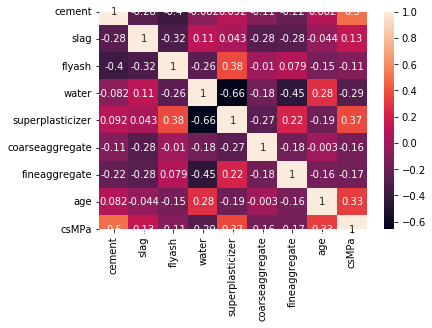

In [50]:
# correlation matrix of the features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

The feature that is most correlated with compressive strength is cement, this shows that the higher the cement content, the higher the compressive strength. Also, superplasticizer and age are fairly correlated with compressive strength.

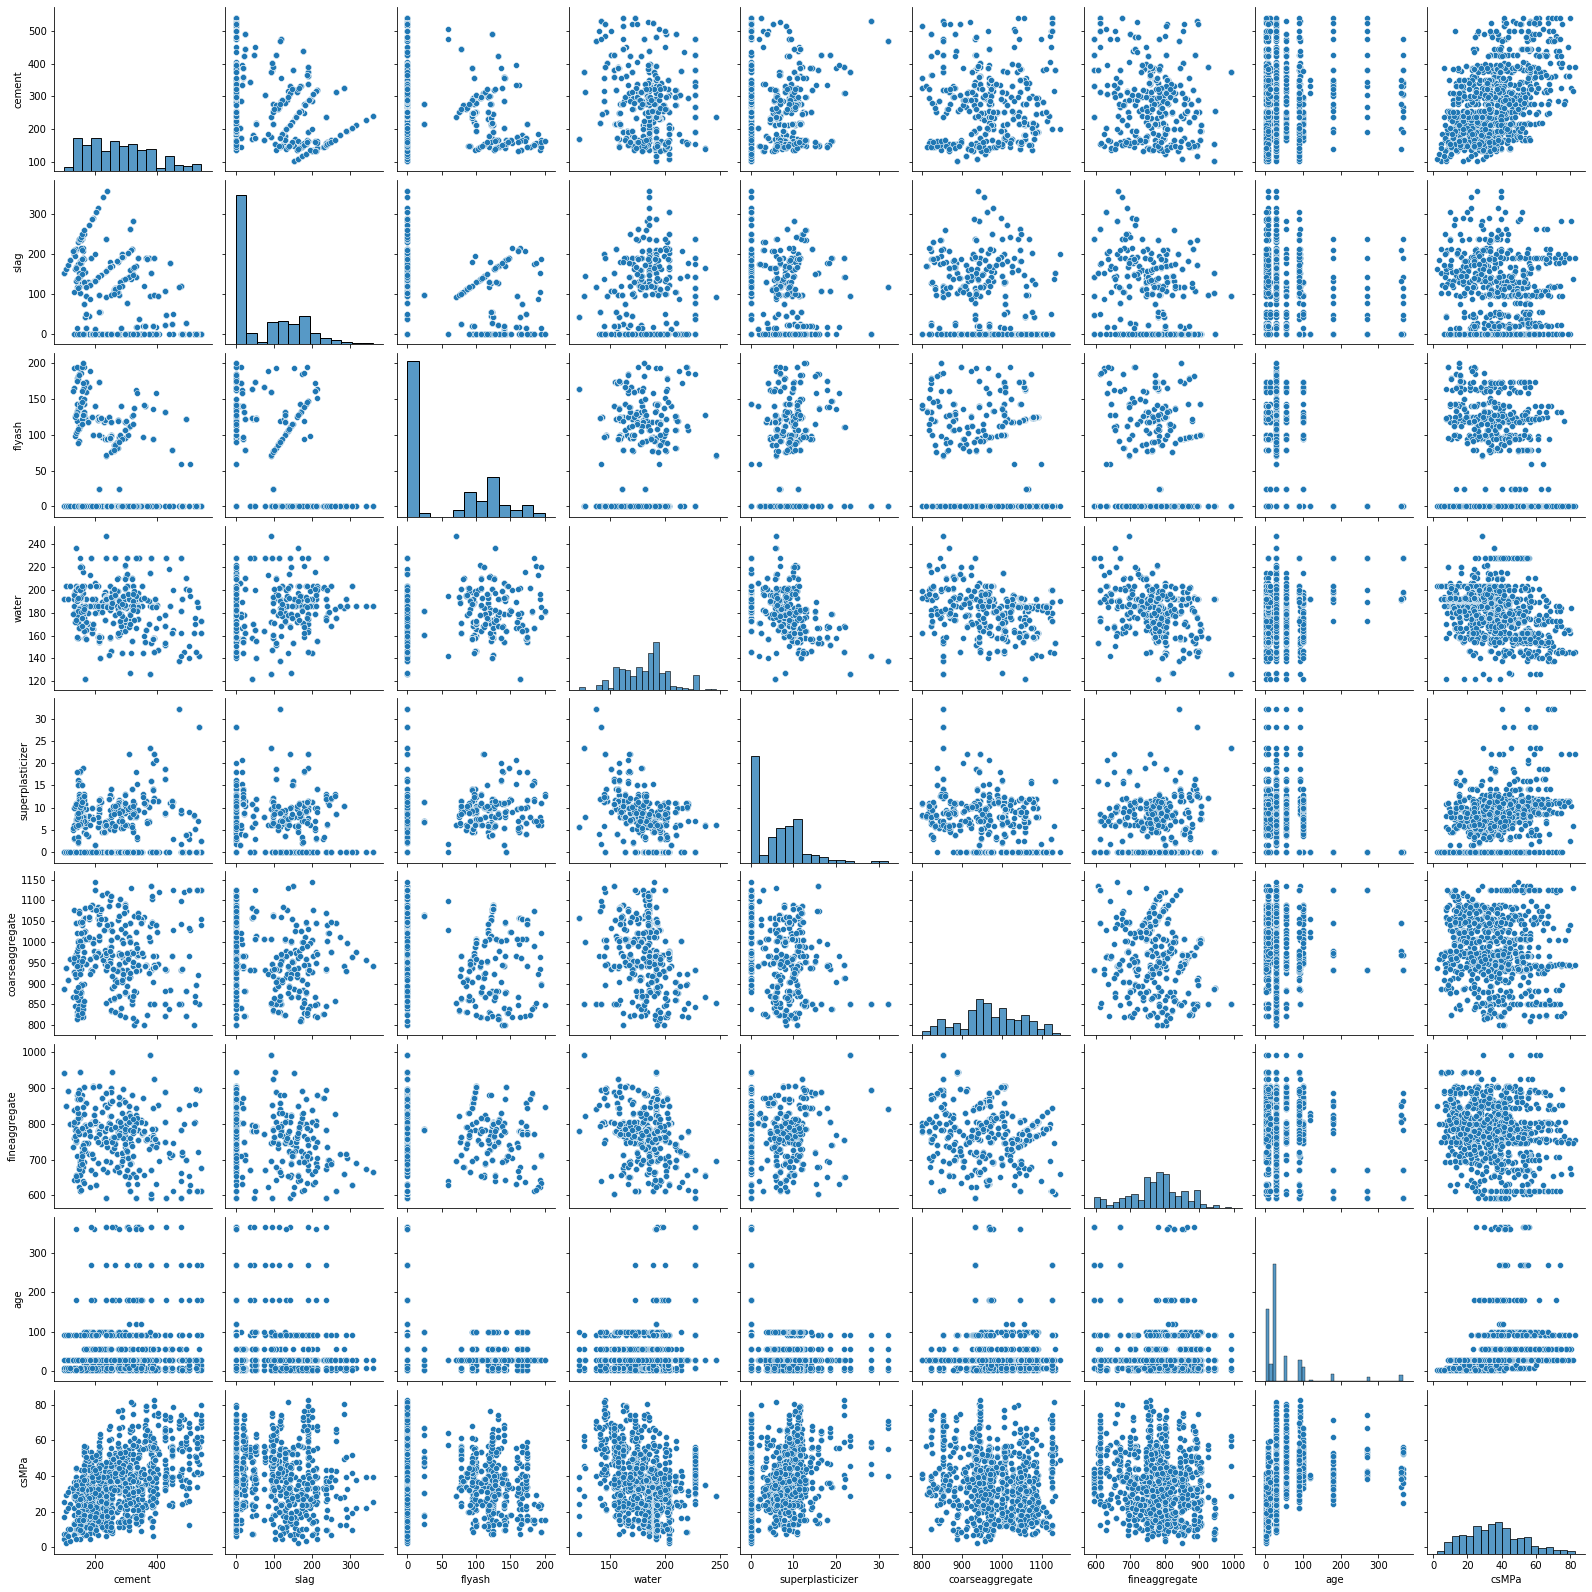

In [51]:
# pairplot of scatterplots and histograms
sns.pairplot(data)

In [52]:
#load label to a separate dataframe
label = data[['csMPa']]
features = data.drop(columns=['csMPa'])

In [53]:
# scale the features
Scaler = MinMaxScaler()
scaled_features = Scaler.fit_transform(features)

In [54]:
# Split the data, 10% for testing and 90% for training
train_label, test_label = train_test_split(label, test_size=0.1)
train_feat, test_feat = train_test_split(scaled_features, test_size=0.1)

In [55]:
# Confirming data split
len(features)

1030

In [56]:
len(test_feat)

103

# Modeling

In [57]:
# Save features as 2d tensorflow variable
x = tf.Variable(train_feat, dtype=tf.float32)

In [58]:
# Save label as 2d tensorflow variable
label_y = train_label[['csMPa']].values
y = tf.Variable(label_y, dtype=tf.float32)


In [59]:
x.shape

TensorShape([927, 8])

In [60]:
y.shape

TensorShape([927, 1])

In [61]:
#  defining parameters 
Number_of_features = 8
Number_of_units = 1
learning_rate = 0.01

# tensorflow variables for weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))

#optimizer
optimizer = tf.optimizers.SGD(learning_rate)


In [62]:
# Regression function
def regression(x):
    z = tf.add(tf.matmul(x,weight),bias)
    return z
    
#train function & loss function
def train(i):
    for n in range(i):
        loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=regression(x))))
        optimizer.minimize(loss, [weight, bias])

# epochs
itr = 1000

train(itr)

In [63]:
# print trained weight and bias
tf.print(weight, bias)

[[0.0701786]
 [0.0298673883]
 [0.0463108271]
 ...
 [0.0891234726]
 [0.0722658038]
 [0.0239213258]] [0.166760653]


In [64]:
# predict the strength for each row of trainign data

ypred = regression(x)
ypred = tf.round(ypred)

In [65]:
from sklearn.metrics import mean_squared_error as mse

In [66]:
# RMSE function
rmse = mse(y.numpy(), ypred.numpy())


In [82]:
#print RMSE
print("RMSE of the trained model: ", np.sqrt(rmse))

RMSE of the trained model:  39.704597


# Conclusion

In [68]:
# use model to predict test data
test_feat = tf.Variable(test_feat, dtype=tf.float32)
pred_test = regression(test_feat)

In [69]:
test_label = test_label[['csMPa']].values
test_label = tf.Variable(test_label, dtype=tf.float32)

In [83]:
#test RMSE
rmse_test = np.sqrt(mse(test_label.numpy(), pred_test.numpy()))
print("RMSE of the testing model:", rmse_test)

RMSE of the testing model: 37.498985


In [78]:
# write code to calculate the percentage of deviations taht are bigger than RMSE
iterations = itr


def deviation(rmse_test):
    loss_t = 0
    for n in range(iterations):
        ypred = regression(test_feat)
        loss = np.abs(test_label - ypred)
        # if loss > rmse_test:
        #     loss_t += loss
    i = 0
    while i < len(loss):
        if loss[i] > rmse_test:
            loss_t += loss[i]
        i += 1
    
    
    return (loss_t/len(loss))


    

In [79]:
# print deviation
dev = deviation(rmse_test)
print(f"The deviation percentage is: {dev[0]}")

The deviation percentage is: 20.823156356811523


# How well the model performs

Our model performs quiet well as the RMSE is lower for training and testing datasets which are below 40, the only uncertainty is that the engineers should consider the geographic conditions of the place where they are going to use the concrete.

As 20 percent of the deviations (ypred-label) are bigger than RMSE, So, our model's uncertainity is bigger than RMSE which implies that the concrete is predicted to be better than what actually it is. Thus, 20 percent of the data points have errors larger than the average error.